In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic')

- 주어진 가상의 고객행동/구매 data를 가지고 사전 행동을 분석하고 EDA 결과 및 행동 특성에 따라 유형화(고객 sgmentation)
- 고객 유형 분류!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename1 = '/content/drive/MyDrive/현대자동차2022/DM1_DS_99_HCKRTHN_CNTT_F.csv'
filename2 = '/content/drive/MyDrive/현대자동차2022/DM1_DS_99_HCKRTHN_DEMO_F.csv'
filename3 = '/content/drive/MyDrive/현대자동차2022/DM1_DS_99_HCKRTHN_PROS_ITG_F.csv'

Mounted at /content/drive


In [ ]:
#차량 정보
carinfo_df = pd.read_csv(filename1,encoding='cp949')
#고객 접촉 이력 정보
cus = pd.read_csv(filename2,encoding='cp949')
#채널 인입 이력
inc = pd.read_csv(filename3,encoding='cp949')

##carinfo_df EDA

---
1. 해당되는 고객의 차량 계약 이력 및 정보
2. 1:n 관계로 다수의 차량 구매 이력


In [ ]:
#차량 정보
carinfo_df = pd.read_csv(filename1,encoding='cp949')
carinfo_df.head(5)

CAR_ID   CNTT_DT VEHL_CD                         DOM_MDL_NM  \
0  C98N3HQIS4G67  20210302      IG    그랜저IG 자가용 하이브리드 PREMIUM A/T F/L   
1  C18MB8E9FEO8O  20220117      M5    포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY   
2  CXMMZDI2JRWCX  20200511      DN  쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄   
3  C934SRCKF4H44  20220104      NX  The all-new 투싼 하이브리드 인스퍼레이션 2WD A   
4  CU1BBNUEHOTDM  20220210      JJ  The All new G80 가솔린 2.5T AWD 19인치   

  PAC_SCN_NM SALE_CGRD_NM SALE_TRIM_NM   SALE_ENG_NM            CUS_ID  
0         승용           대형      PREMIUM         하이브리드  APW9ZIWDQQNYY8LK  
1       소형상용         소형트럭          스타일            디젤  AGBCIS57DPHRRP9X  
2         승용           중형     프리미엄 패밀리  가솔린 2.0 CVVL  A4W2GG6ZLMZ81DB3  
3         RV       준중형SUV       인스퍼레이션         하이브리드  ATHNS3F4766FKDW3  
4         승용           대형   19인치A SDS2      가솔린 2.5T  A8D7NHFKA3K83QH4

In [ ]:
carinfo_df.rename(columns = {
    "CAR_ID":"차량ID",
    "CNTT_DT":"계약일자",
    "VEHL_CD":"차종코드",
    "DOM_MDL_NM":"모델명",
    "PAC_SCN_NM":"승상구분명",
    "SALE_CGRD_NM":"판매차급명",
    "SALE_TRIM_NM":"판매트림명",
    "SALE_ENG_NM":"판매엔진명",
    "CUS_ID":"고객ID",
}, inplace = True)
carinfo_df

차량ID      계약일자 차종코드                                모델명 승상구분명  \
0      C98N3HQIS4G67  20210302   IG    그랜저IG 자가용 하이브리드 PREMIUM A/T F/L    승용   
1      C18MB8E9FEO8O  20220117   M5    포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY  소형상용   
2      CXMMZDI2JRWCX  20200511   DN  쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄    승용   
3      C934SRCKF4H44  20220104   NX  The all-new 투싼 하이브리드 인스퍼레이션 2WD A    RV   
4      CU1BBNUEHOTDM  20220210   JJ  The All new G80 가솔린 2.5T AWD 19인치    승용   
...              ...       ...  ...                                ...   ...   
72780  CF5XYYWGM4962  20111025   MD        아반떼MD 자가용 가솔린 1.6 A 오토 11MY    승용   
72781  C91VRA1RAE6EL  20160504   TL        투싼TL 디젤 1.7 Premium 2WD DCT    RV   
72782  COAFAA0KQ2F1N  20220203   NX  The all-new 투싼 하이브리드 프리미엄 2WD A/T    RV   
72783  COBZ4YAULMIMD  20100729   JA   G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY  소형상용   
72784  CVJ1K1B9RQCRP  20180213   AE          아이오닉 자가용 하이브리드 N DCT 17MY    승용   

        판매차급명       판매트림명         판매엔진명              고객ID  
0          대형     PREMIUM         하이브리드  APW9ZIWDQQNYY8LK  
1        소형트럭         스타일            디젤  AGBCIS57DPHRRP9X  
2          중형    프리미엄 패밀리  가솔린 2.0 CVVL  A4W2GG6ZLMZ81DB3  
3      준중형SUV      인스퍼레이션         하이브리드  ATHNS3F4766FKDW3  
4          대형  19인치A SDS2      가솔린 2.5T  A8D7NHFKA3K83QH4  
...       ...         ...           ...               ...  
72780     준중형           A       가솔린 1.6  ACWSOYPRRWLHL2I1  
72781  준중형SUV     Premium        디젤 1.7  ACWSOYPRRWLHL2I1  
72782  준중형SUV        프리미엄         하이브리드  AF3D2H4N6PO5PY24  
72783    소형버스         CVX            디젤  APXWMUKE36MD8PX1  
72784     준중형           N         하이브리드  AMFQZP101GIOOERA  

[72785 rows x 9 columns]

In [ ]:
carinfo_df.isna().any()

차량ID     False
계약일자     False
차종코드     False
모델명      False
승상구분명    False
판매차급명    False
판매트림명     True
판매엔진명     True
고객ID     False
dtype: bool

In [ ]:
carinfo_df.isnull().sum()

차량ID      0
계약일자      0
차종코드      0
모델명       0
승상구분명     0
판매차급명     0
판매트림명    11
판매엔진명    73
고객ID      0
dtype: int64

In [ ]:
#데이터의 고유치 갯수
carinfo_df.nunique()

차량ID     72785
계약일자      3713
차종코드        59
모델명       2515
승상구분명        3
판매차급명       12
판매트림명      326
판매엔진명       79
고객ID     51397
dtype: int64

In [ ]:
carinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72785 entries, 0 to 72784
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   차량ID    72785 non-null  object
 1   계약일자    72785 non-null  int64 
 2   차종코드    72785 non-null  object
 3   모델명     72785 non-null  object
 4   승상구분명   72785 non-null  object
 5   판매차급명   72785 non-null  object
 6   판매트림명   72774 non-null  object
 7   판매엔진명   72712 non-null  object
 8   고객ID    72785 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.0+ MB


In [ ]:
import datetime
carinfo_df['계약일자'] = carinfo_df['계약일자'].astype('str')
carinfo_df['계약일자'] = carinfo_df['계약일자'].apply(lambda _ : datetime.datetime.strptime(_,'%Y%m%d'))

In [ ]:
carinfo_df

차량ID       계약일자 차종코드                                모델명 승상구분명  \
0      C98N3HQIS4G67 2021-03-02   IG    그랜저IG 자가용 하이브리드 PREMIUM A/T F/L    승용   
1      C18MB8E9FEO8O 2022-01-17   M5    포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY  소형상용   
2      CXMMZDI2JRWCX 2020-05-11   DN  쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄    승용   
3      C934SRCKF4H44 2022-01-04   NX  The all-new 투싼 하이브리드 인스퍼레이션 2WD A    RV   
4      CU1BBNUEHOTDM 2022-02-10   JJ  The All new G80 가솔린 2.5T AWD 19인치    승용   
...              ...        ...  ...                                ...   ...   
72780  CF5XYYWGM4962 2011-10-25   MD        아반떼MD 자가용 가솔린 1.6 A 오토 11MY    승용   
72781  C91VRA1RAE6EL 2016-05-04   TL        투싼TL 디젤 1.7 Premium 2WD DCT    RV   
72782  COAFAA0KQ2F1N 2022-02-03   NX  The all-new 투싼 하이브리드 프리미엄 2WD A/T    RV   
72783  COBZ4YAULMIMD 2010-07-29   JA   G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY  소형상용   
72784  CVJ1K1B9RQCRP 2018-02-13   AE          아이오닉 자가용 하이브리드 N DCT 17MY    승용   

        판매차급명       판매트림명         판매엔진명              고객ID  
0          대형     PREMIUM         하이브리드  APW9ZIWDQQNYY8LK  
1        소형트럭         스타일            디젤  AGBCIS57DPHRRP9X  
2          중형    프리미엄 패밀리  가솔린 2.0 CVVL  A4W2GG6ZLMZ81DB3  
3      준중형SUV      인스퍼레이션         하이브리드  ATHNS3F4766FKDW3  
4          대형  19인치A SDS2      가솔린 2.5T  A8D7NHFKA3K83QH4  
...       ...         ...           ...               ...  
72780     준중형           A       가솔린 1.6  ACWSOYPRRWLHL2I1  
72781  준중형SUV     Premium        디젤 1.7  ACWSOYPRRWLHL2I1  
72782  준중형SUV        프리미엄         하이브리드  AF3D2H4N6PO5PY24  
72783    소형버스         CVX            디젤  APXWMUKE36MD8PX1  
72784     준중형           N         하이브리드  AMFQZP101GIOOERA  

[72785 rows x 9 columns]

In [ ]:
#기간 보기 (2008/01 ~ 2022/06)

set_of_year_month = list(set([(x.year, x.month) for x in carinfo_df['계약일자']])) #연도와 월정보를 가져온다.
for ym in sorted(set_of_year_month, key=lambda x: (x[0], x[1])): #연도와 월정보를 연도, 월 순으로 출력 
    print(f'{ym[0]}년 {ym[1]}월')

2008년 1월
2008년 2월
2008년 3월
2008년 4월
2008년 5월
2008년 6월
2008년 7월
2008년 8월
2008년 9월
2008년 10월
2008년 11월
2008년 12월
2009년 1월
2009년 2월
2009년 3월
2009년 4월
2009년 5월
2009년 6월
2009년 7월
2009년 8월
2009년 9월
2009년 10월
2009년 11월
2009년 12월
2010년 1월
2010년 2월
2010년 3월
2010년 4월
2010년 5월
2010년 6월
2010년 7월
2010년 8월
2010년 9월
2010년 10월
2010년 11월
2010년 12월
2011년 1월
2011년 2월
2011년 3월
2011년 4월
2011년 5월
2011년 6월
2011년 7월
2011년 8월
2011년 9월
2011년 10월
2011년 11월
2011년 12월
2012년 1월
2012년 2월
2012년 3월
2012년 4월
2012년 5월
2012년 6월
2012년 7월
2012년 8월
2012년 9월
2012년 10월
2012년 11월
2012년 12월
2013년 1월
2013년 2월
2013년 3월
2013년 4월
2013년 5월
2013년 6월
2013년 7월
2013년 8월
2013년 9월
2013년 10월
2013년 11월
2013년 12월
2014년 1월
2014년 2월
2014년 3월
2014년 4월
2014년 5월
2014년 6월
2014년 7월
2014년 8월
2014년 9월
2014년 10월
2014년 11월
2014년 12월
2015년 1월
2015년 2월
2015년 3월
2015년 4월
2015년 5월
2015년 6월
2015년 7월
2015년 8월
2015년 9월
2015년 10월
2015년 11월
2015년 12월
2016년 1월
2016년 2월
2016년 3월
2016년 4월
2016년 5월
2016년 6월
2016년 7월
2016년 8월
2016년 9월
2016년 10월
2016년 11월
2016년 12월
2

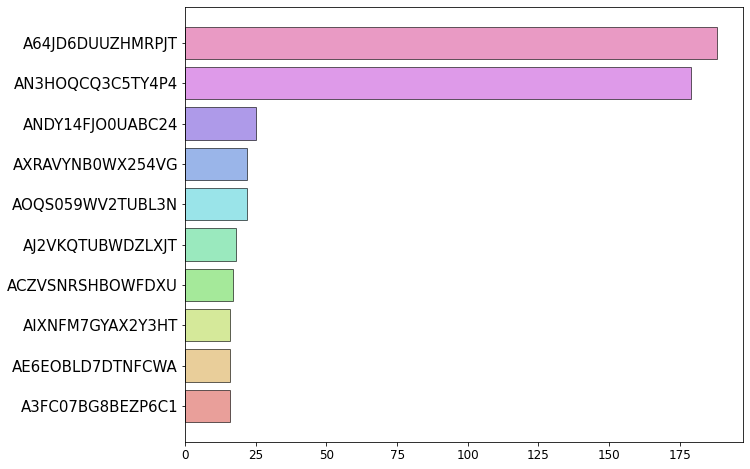

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
top_data = Counter(carinfo_df['고객ID']).most_common() ## 데이터 개수가 많은 순으로 출력
top_data = top_data[:10] ## 상위 10개만 저장

data = [x[1] for x in top_data] ## 데이터 개수
cus = [x[0] for x in top_data] ## 고객
 
## 수평 바차트에서 데이터 개수와 고객을 맨위로 출력하기 위해서 리스트 순서를 바꿈
cus.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(10,8))

fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(cus, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

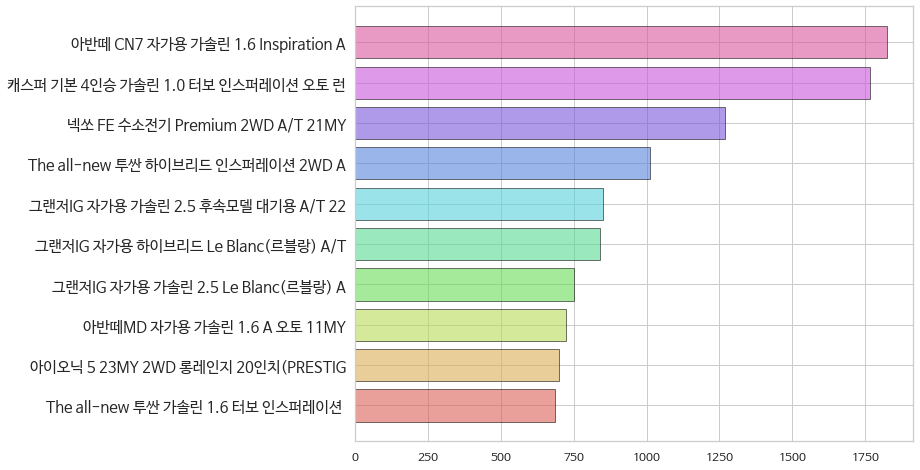

In [ ]:
top_data = Counter(carinfo_df['모델명']).most_common() ## 데이터 개수가 많은 순으로 출력
top_data = top_data[:10] ## 상위 5개만 저장
 
data = [x[1] for x in top_data] ## 데이터 개수
cus = [x[0] for x in top_data] ## 고객
 
## 수평 바차트에서 데이터 개수와 고객을 맨위로 출력하기 위해서 리스트 순서를 바꿈
cus.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(10,8))

fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정
 
plt.barh(cus, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

In [ ]:
sns.set(font="AppleGothic",
rc={"axes.unicode_minus":False}, style='white')
plt.rc('font', family='NanumBarunGothic')

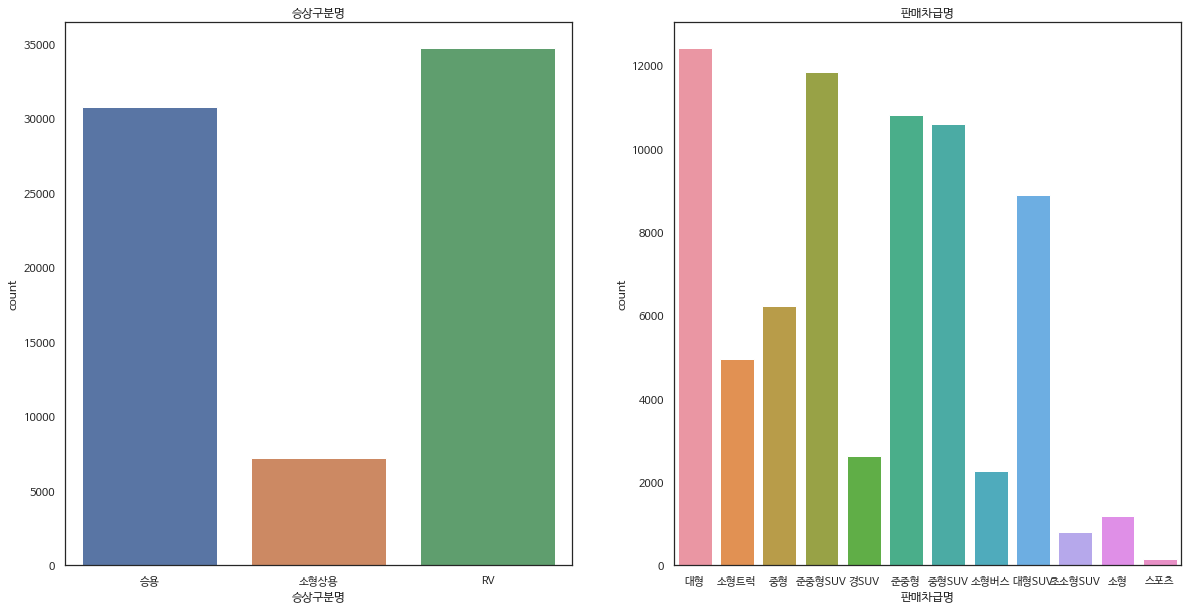

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))

# carinfo_df['승상구분명'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('승상구분명',data=carinfo_df, ax=ax[0])
ax[0].set_title('승상구분명')

sns.countplot('판매차급명',data=carinfo_df, ax=ax[1])
ax[1].set_title('판매차급명')
plt.show()

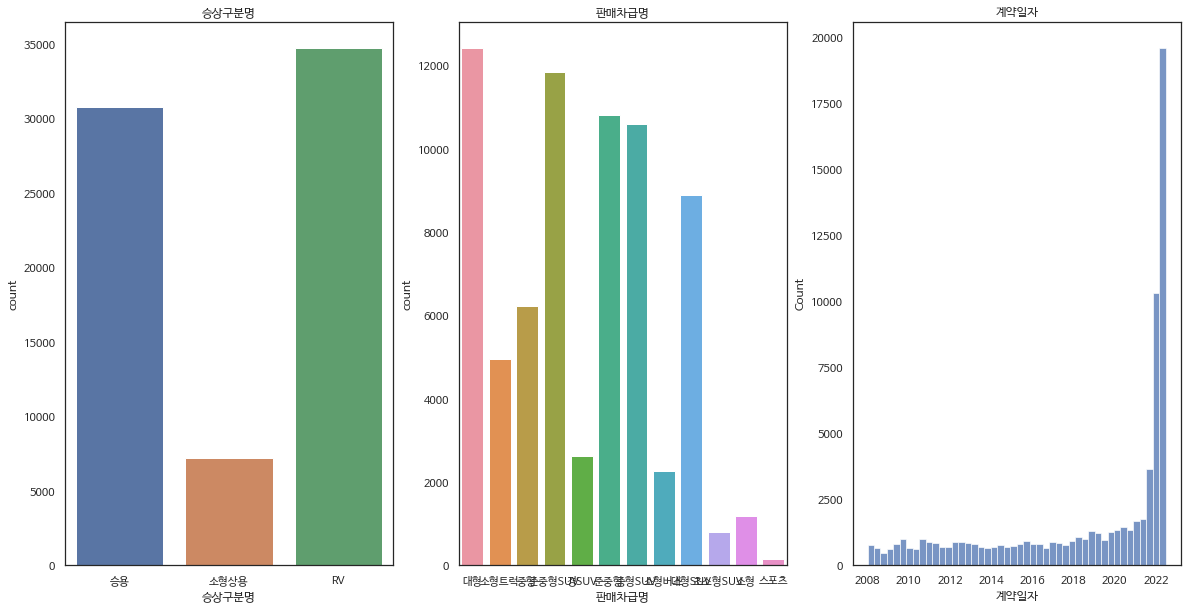

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,10))

# carinfo_df['승상구분명'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('승상구분명',data=carinfo_df, ax=ax[0])
ax[0].set_title('승상구분명')

sns.countplot('판매차급명',data=carinfo_df, ax=ax[1])
ax[1].set_title('판매차급명')

sns.histplot(data=carinfo_df, x='계약일자',ax=ax[2])
ax[2].set_title('계약일자')

plt.show()

##cus EDA

In [ ]:
cus = pd.read_csv(filename2,encoding='cp949')
cus.head(3)

CUS_ID PSN_BIZR_YN    TYMD SEX_SCN_NM
0  AMR9MOP756HN28V9           N  1990.0         여자
1  AL2E2HLDMN50FN9E           N  1955.0         남자
2  APW9ZIWDQQNYY8LK           N  1992.0         남자

In [ ]:
cus.rename(columns = {
    "CUS_ID":"고객ID",
    "PSN_BIZR_YN":"개인사업자여부",
    "TYMD":"생년",
    "SEX_SCN_NM":"성별구분명",
}, inplace = True)
cus

고객ID 개인사업자여부      생년 성별구분명
0      AMR9MOP756HN28V9       N  1990.0    여자
1      AL2E2HLDMN50FN9E       N  1955.0    남자
2      APW9ZIWDQQNYY8LK       N  1992.0    남자
3      AGBCIS57DPHRRP9X       N  1977.0    남자
4      A4W2GG6ZLMZ81DB3       N  1974.0    여자
...                 ...     ...     ...   ...
89575  AF3D2H4N6PO5PY24       N  1968.0    남자
89576  AQSF1UNGCVX5CVJH       N  1984.0    남자
89577  ARJA0WA3EEXVZQFW       N  1982.0    남자
89578  APXWMUKE36MD8PX1       N  1984.0    남자
89579  AMFQZP101GIOOERA       N  1980.0    남자

[89580 rows x 4 columns]

Text(0, 0.5, '')

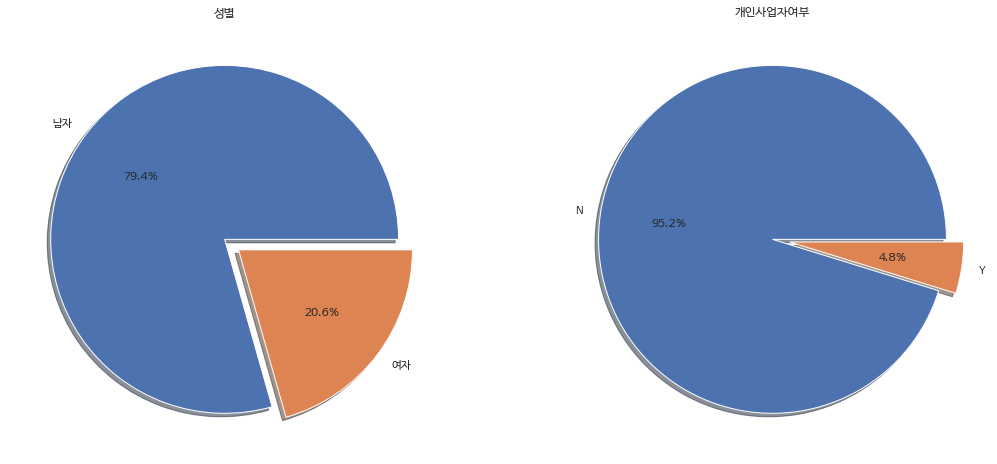

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

cus['성별구분명'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('성별')
ax[0].set_ylabel('')

cus['개인사업자여부'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('개인사업자여부')
ax[1].set_ylabel('')

In [ ]:
cus.nunique()

고객ID       89580
개인사업자여부        2
생년            81
성별구분명          2
dtype: int64

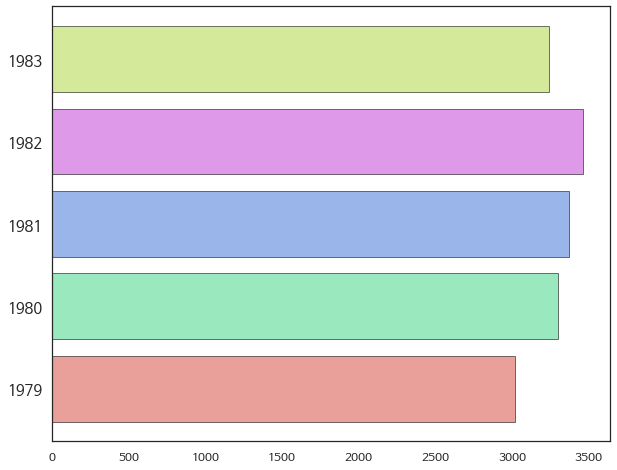

In [ ]:
top_data = Counter(cus['생년']).most_common() ## 데이터 개수가 많은 순으로 출력
top_data = top_data[:5] ## 상위 10개만 저장
 
data = [x[1] for x in top_data] ## 데이터 개수
cus = [x[0] for x in top_data] ## 고객
cus.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(10,8))

fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정
 
plt.barh(cus, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

##inc EDA

In [ ]:
inc = pd.read_csv(filename3,encoding='cp949')

In [ ]:
inc.head(5)

CUS_ID           CASE_ID              INP_DTM CHAN_SCN_NM  \
0  AKZWMZWJ3HTYTOSS  BK69SK0W9NOEXIQU  2022-01-09 16:00:00       시승시스템   
1  AAMN599HM0XFRIRK  BCPT4WL1QHD8LK1M  2022-01-12 10:00:00       시승시스템   
2  AP8ERGN3MGXWD0W1  BUYAFEX9M7PATNIF  2022-01-09 18:41:28        현대닷컴   
3  ASIYQ5LM878U45P5  BVCR9MK9FIRXEUCL  2022-01-11 18:41:21      이벤트시스템   
4  A8KWVKZPITWG0PCO  BNQ8X4SUSC120MRF  2022-01-10 09:03:09   판매기회_상담완료   

  CHAN_DTL_SCN_NM IRD_VEHL_CD  
0              시승          JW  
1              시승          QX  
2              견적          NX  
3          구매상담신청         NaN  
4            지속관리          JJ

In [ ]:
inc.rename(columns = {
    "CUS_ID":"고객ID",
    "CASE_ID":"접촉ID",
    "INP_DTM":"인입일시",
    "CHAN_SCN_NM":"채널구분명",
    "CHAN_DTL_SCN_NM":"채널상세구분명",
    "IRD_VEHL_CD":"관심차량",
}, inplace = True)
inc

고객ID              접촉ID                 인입일시      채널구분명  \
0       AKZWMZWJ3HTYTOSS  BK69SK0W9NOEXIQU  2022-01-09 16:00:00      시승시스템   
1       AAMN599HM0XFRIRK  BCPT4WL1QHD8LK1M  2022-01-12 10:00:00      시승시스템   
2       AP8ERGN3MGXWD0W1  BUYAFEX9M7PATNIF  2022-01-09 18:41:28       현대닷컴   
3       ASIYQ5LM878U45P5  BVCR9MK9FIRXEUCL  2022-01-11 18:41:21     이벤트시스템   
4       A8KWVKZPITWG0PCO  BNQ8X4SUSC120MRF  2022-01-10 09:03:09  판매기회_상담완료   
...                  ...               ...                  ...        ...   
159166  AS7OEWKWHIAK2WZ1  BS94L650O9PWIXE1  2022-03-07 18:09:35  판매기회_상담완료   
159167  AVFD9EAOXP2BYXQY  BIL593DS4LTUT2JP  2022-02-03 10:23:16  판매기회_상담완료   
159168  AA9FVJGB2L5OG3IW  B26O6YSJL6XOIHIZ  2022-03-14 11:05:38  판매기회_상담완료   
159169  AIJ2KUXDXEV0VDUS  BXQDUBABH92L3XOQ  2022-05-09 10:04:17  판매기회_상담완료   
159170  AMJX3PS4HG70WXLA  BU3VXVVBH08FAOQM  2022-06-09 11:10:14  판매기회_상담완료   

       채널상세구분명 관심차량  
0           시승   JW  
1           시승   QX  
2           견적   NX  
3       구매상담신청  NaN  
4         지속관리   JJ  
...        ...  ...  
159166    지속관리   NX  
159167    지속관리  NaN  
159168    지속관리   LC  
159169    지속관리  NaN  
159170    지속관리  NaN  

[159171 rows x 6 columns]

In [ ]:
inc_1 = inc[['고객ID','채널구분명','채널상세구분명','관심차량']]

In [ ]:
inc_1

고객ID      채널구분명 채널상세구분명 관심차량
0       AKZWMZWJ3HTYTOSS      시승시스템      시승   JW
1       AAMN599HM0XFRIRK      시승시스템      시승   QX
2       AP8ERGN3MGXWD0W1       현대닷컴      견적   NX
3       ASIYQ5LM878U45P5     이벤트시스템  구매상담신청  NaN
4       A8KWVKZPITWG0PCO  판매기회_상담완료    지속관리   JJ
...                  ...        ...     ...  ...
159166  AS7OEWKWHIAK2WZ1  판매기회_상담완료    지속관리   NX
159167  AVFD9EAOXP2BYXQY  판매기회_상담완료    지속관리  NaN
159168  AA9FVJGB2L5OG3IW  판매기회_상담완료    지속관리   LC
159169  AIJ2KUXDXEV0VDUS  판매기회_상담완료    지속관리  NaN
159170  AMJX3PS4HG70WXLA  판매기회_상담완료    지속관리  NaN

[159171 rows x 4 columns]

In [ ]:
inc.nunique()

고객ID        94367
접촉ID       142059
인입일시       101831
채널구분명           6
채널상세구분명         9
관심차량           34
dtype: int64

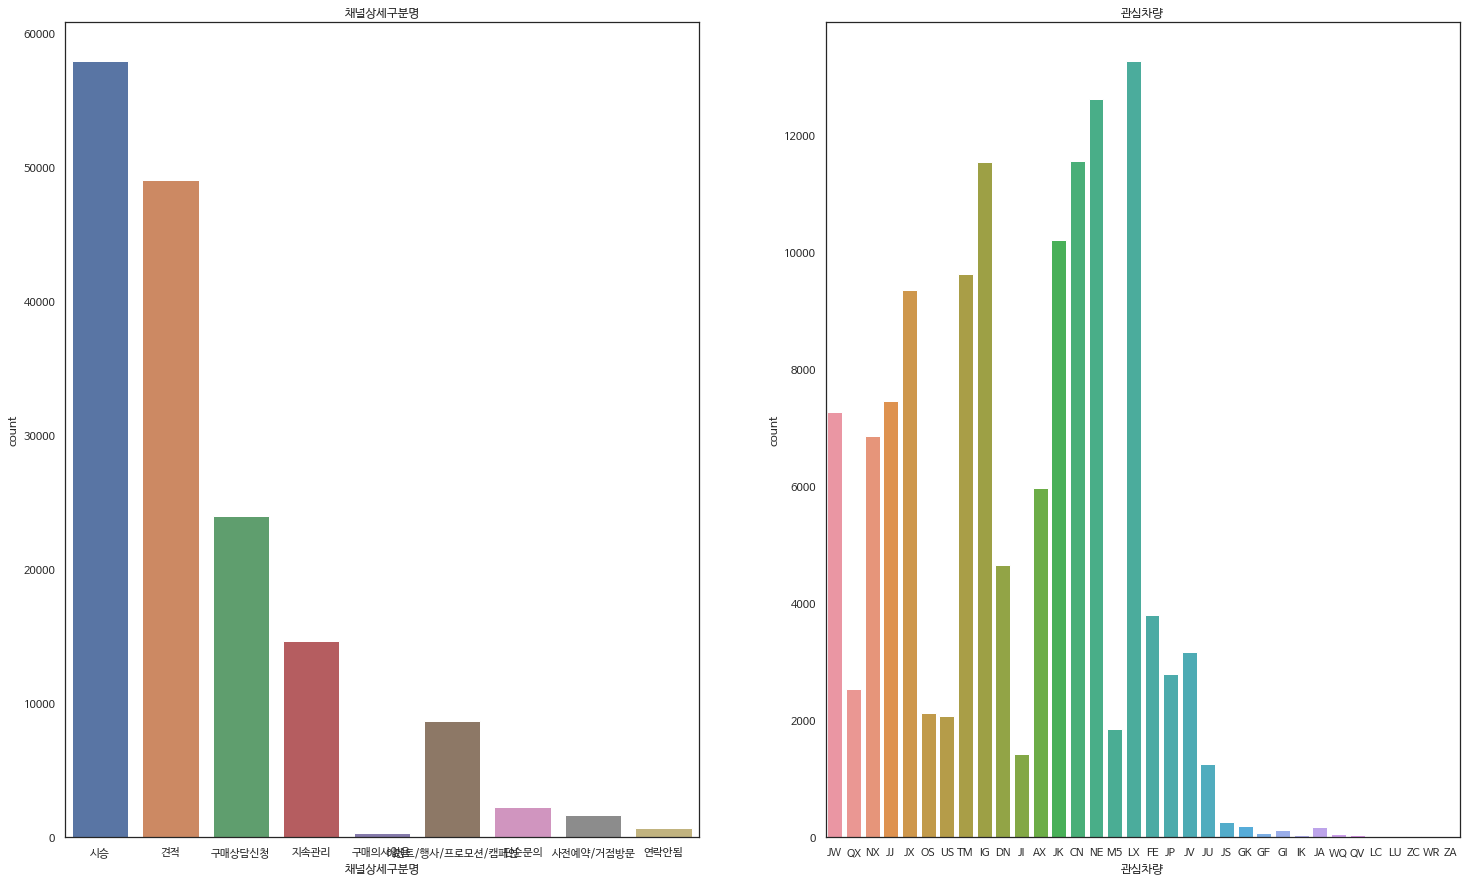

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))

sns.countplot('채널상세구분명',data=inc, ax=ax[0])
ax[0].set_title('채널상세구분명')

sns.countplot('관심차량',data=inc, ax=ax[1])
ax[1].set_title('관심차량')
plt.show()

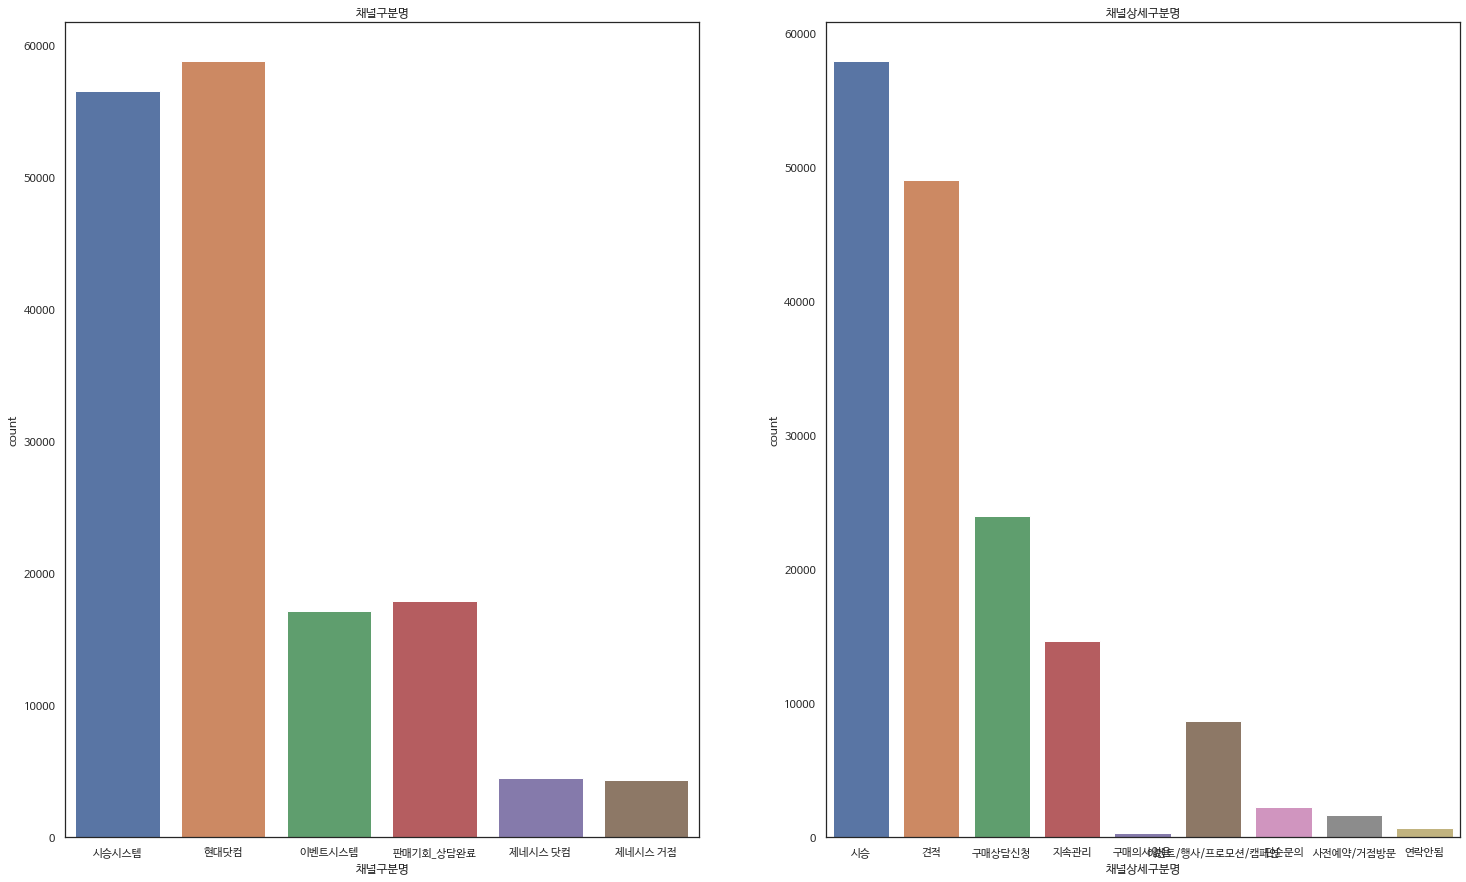

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))

sns.countplot('채널구분명',data=inc, ax=ax[0])
ax[0].set_title('채널구분명')

sns.countplot('채널상세구분명',data=inc, ax=ax[1])
ax[1].set_title('채널상세구분명')
plt.show()